In [1]:
import numpy as np
import extracted_data_reader
from tsai.all import *

# Training the model

In [2]:
# initialization variables
show_splitting_dist = False
show_images = True
find_lr = False

ex_number = 1
frame_number = "max" # mean, max or min
epochs_number = 20
batch_size = 32

In [3]:
# get training data
X = np.array(extracted_data_reader.read_data_ex(ex_number=ex_number, frame_number=frame_number))
Y = np.array(extracted_data_reader.read_target_ex(ex_number=ex_number))
y = np.array([y[:5] for y in Y])

X.shape, y.shape

((229, 18, 380), (229, 5))

In [4]:
# split data with leave-one-out cross-validation 
splits = get_splits(y, n_splits=len(y), shuffle=False, show_plot=show_splitting_dist)

epoch,train_loss,valid_loss,accuracy,time
0,1.122008,1.602470,0.000000,00:11
1,0.779958,1.521729,0.200000,00:11
2,0.631894,1.396148,0.600000,00:11
3,0.553773,2.119276,0.200000,00:11
4,0.618317,12.410429,0.200000,00:11
5,0.676432,5.482901,0.400000,00:11
6,0.679183,20.843588,0.400000,00:11
7,0.645545,11.589277,0.400000,00:11
8,0.602897,27.855310,0.000000,00:11
9,0.564472,22.814407,0.200000,00:11


1.0


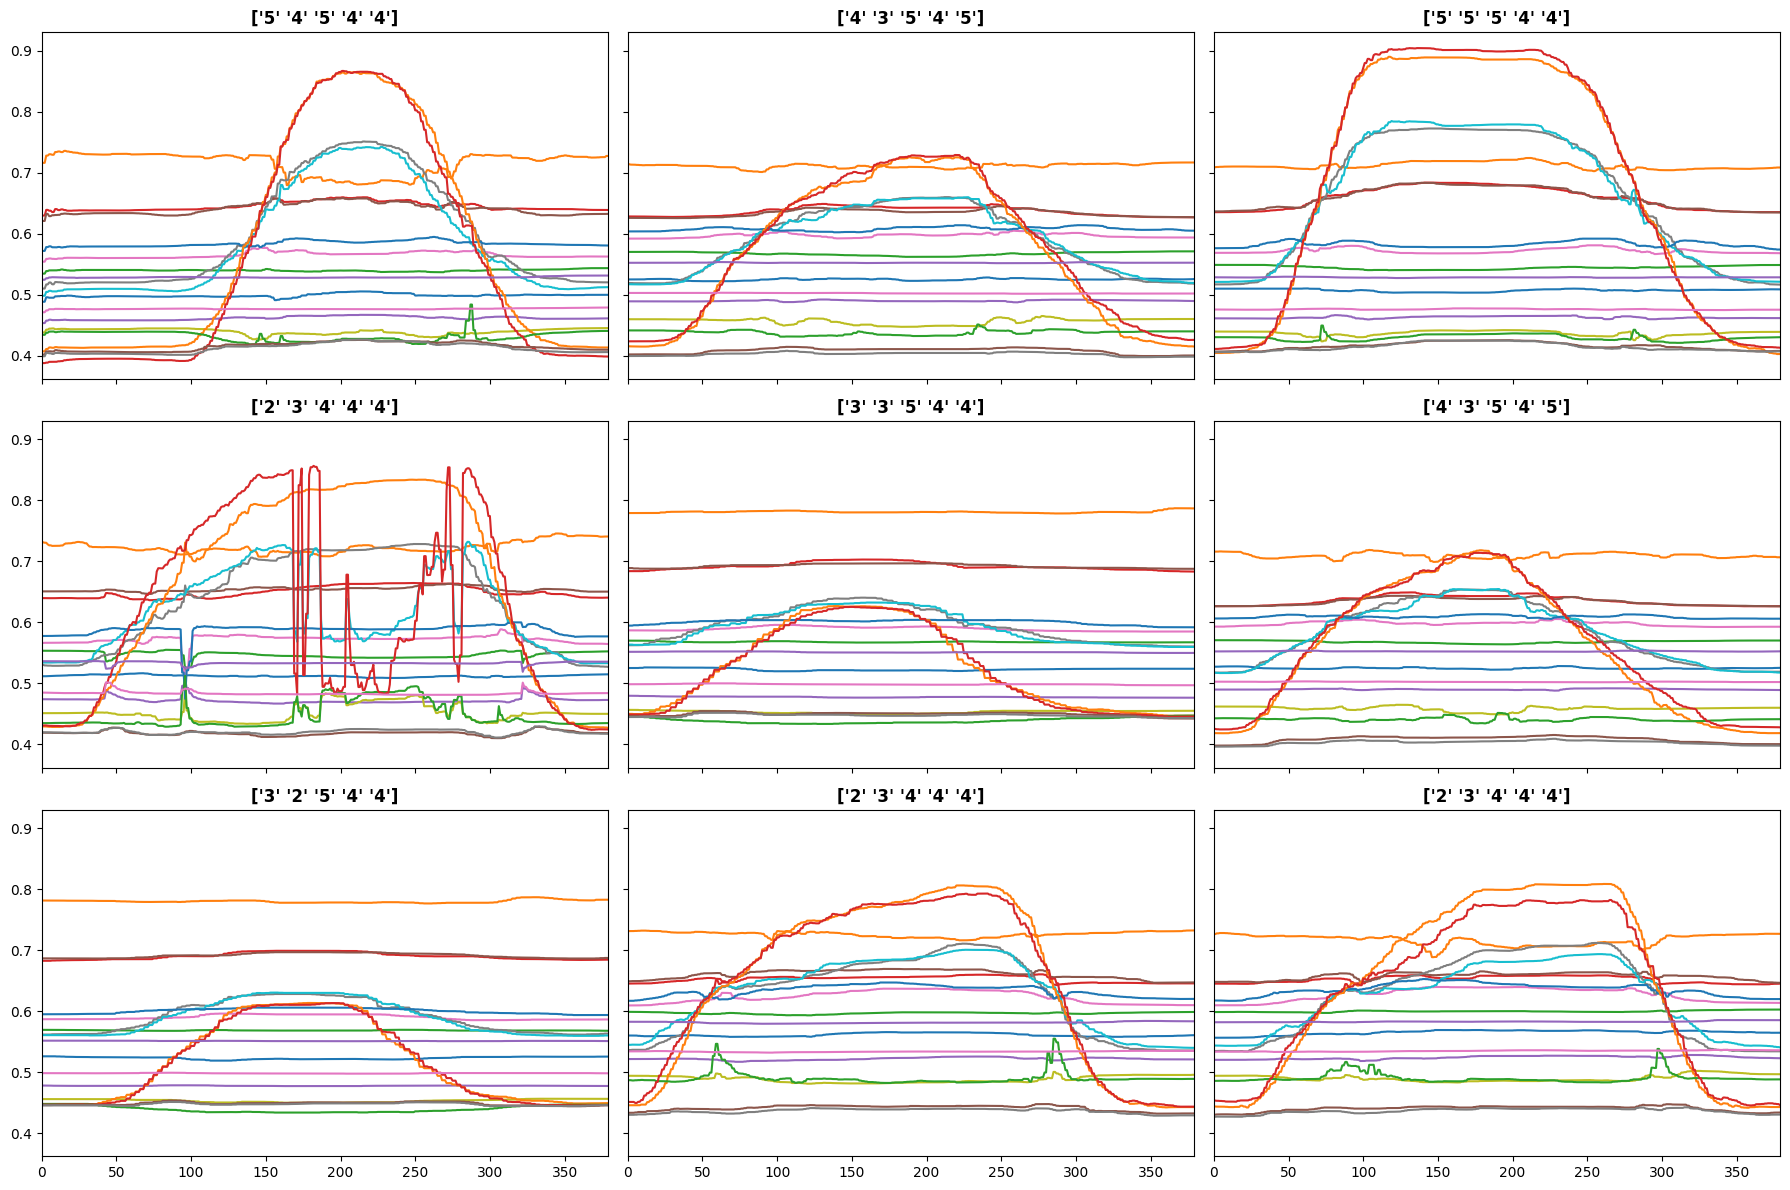

In [7]:
tfms = [None, TSClassification()]
accuracies = []
# leave-one-out cross validation
for split in splits[:1]:
    # create the datasets
    ds = TSDatasets(X, y, splits=split, tfms=tfms, inplace=True)
    # create the data loader from the datasets
    dls = TSDataLoaders.from_dsets(ds.train, ds.valid, bs=batch_size, batch_tfms=tfms, num_workers=0)
    if show_images: dls.show_batch(sharey=True)
    # create learner of an InceptionTimePlus model
    learn = ts_learner(dls, 'InceptionTimePlus', metrics=accuracy)
    # fit the model
    learn.fit_one_cycle(epochs_number, 1e-3)
    accuracies.append(learn.validate()[1])

In [8]:
np.mean(np.array(accuracies))

1.0

In [ ]:
# save metrics images of the model 
image_base_name = f"C:/Users/Gabriele/Downloads/Uni/IOR-Rehab-Thesis/images/models/ex{ex_number}/ex{ex_number}_{frame_number}"
learn.recorder.plot_metrics(figname=f"{image_base_name}_metrics.png")
learn.show_results(figname=f"{image_base_name}_results.png")
# learn.show_probas(figname=f"{image_base_name}_probas.png")
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figname=f"{image_base_name}_confusion_matrix.png")

In [ ]:
# save the model
learn.export(f"models/ex{ex_number}_{frame_number}.pkl")

# Testing the model

In [ ]:
# initialize testing variables
ex_number_test = 1
frame_number_test = "mean"

In [ ]:
# get testing data
X_test = np.array(extracted_data_reader.read_data_ex(ex_number_test, frame_number_test, test=True))

In [ ]:
# load the model 
learn = load_learner(f"models/ex{ex_number_test}_{frame_number_test}.pkl")

In [ ]:
# predict results
probas, target, preds = learn.get_X_preds(X_test)
preds